In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Activation, MaxPooling2D, Dropout
from keras.callbacks import EarlyStopping
from sklearn import preprocessing
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [4]:
import zipfile,os
base_dir = '/content/drive/MyDrive/COVID-19_Radiography_Dataset'
os.listdir(base_dir)

['COVID.metadata.xlsx',
 'Lung_Opacity.metadata.xlsx',
 'Normal.metadata.xlsx',
 'README.md.txt',
 'Viral Pneumonia.metadata.xlsx',
 'COVID',
 'Viral Pneumonia',
 'Lung_Opacity',
 'Normal']

In [5]:
classes=["COVID", "Lung_Opacity", "Normal", "Viral Pneumonia"]

In [6]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [7]:
datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'constant',
                    validation_split=0.2)

In [8]:
train_generator=datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    color_mode='rgb',
    batch_size=4,
    class_mode='categorical',
    subset='training')

validation_generator=datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    color_mode='rgb',
    batch_size=4,
    class_mode='categorical',
    subset='validation')

Found 16933 images belonging to 4 classes.
Found 4232 images belonging to 4 classes.


In [10]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(4, activation='softmax'),
])

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [12]:
early = EarlyStopping(patience=5, monitor='val_loss', mode = 'min',verbose=0)
history = model.fit(train_generator, epochs=8, validation_data=validation_generator, callbacks=[early])

Epoch 1/8
4234/4234 [==============================] - 4426s 1s/step - loss: 0.8648 - accuracy: 0.6487 - val_loss: 0.6667 - val_accuracy: 0.7342
Epoch 2/8
4234/4234 [==============================] - 1130s 267ms/step - loss: 0.6836 - accuracy: 0.7315 - val_loss: 0.5963 - val_accuracy: 0.7512
Epoch 3/8
4234/4234 [==============================] - 1137s 268ms/step - loss: 0.6010 - accuracy: 0.7699 - val_loss: 0.5234 - val_accuracy: 0.7937
Epoch 4/8
4234/4234 [==============================] - 1132s 267ms/step - loss: 0.5616 - accuracy: 0.7886 - val_loss: 0.5302 - val_accuracy: 0.7977
Epoch 5/8
4234/4234 [==============================] - 1148s 271ms/step - loss: 0.5159 - accuracy: 0.8085 - val_loss: 0.5087 - val_accuracy: 0.8020
Epoch 6/8
4234/4234 [==============================] - 1138s 269ms/step - loss: 0.5034 - accuracy: 0.8099 - val_loss: 0.4921 - val_accuracy: 0.8157
Epoch 7/8
4234/4234 [==============================] - 1144s 270ms/step - loss: 0.4883 - accuracy: 0.8192 - val_los

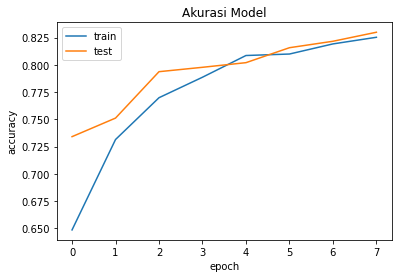

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

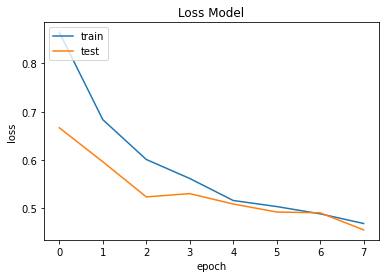

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmprib3c4_z/assets
